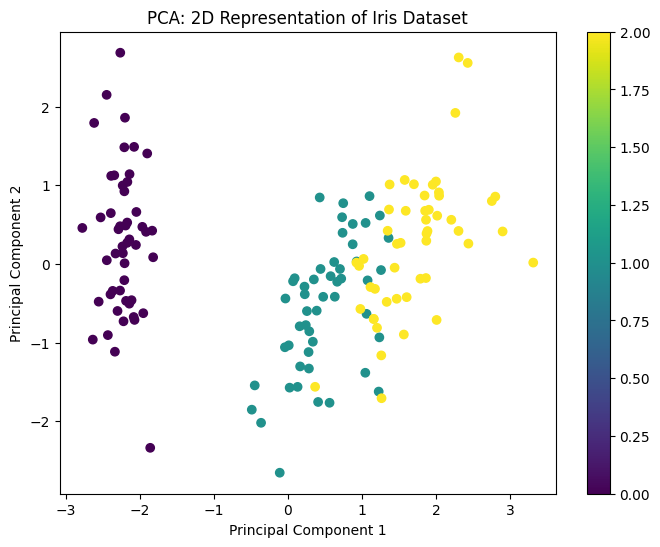

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler

# Load the Iris dataset
iris = load_iris()
X = iris.data  # Features
y = iris.target  # Target labels

# Standardize the features (important for PCA)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA to reduce dimensions to 2D
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Visualize the reduced data
plt.figure(figsize=(8, 6))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis')
plt.colorbar(scatter)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA: 2D Representation of Iris Dataset')
plt.show()


Date column converted successfully


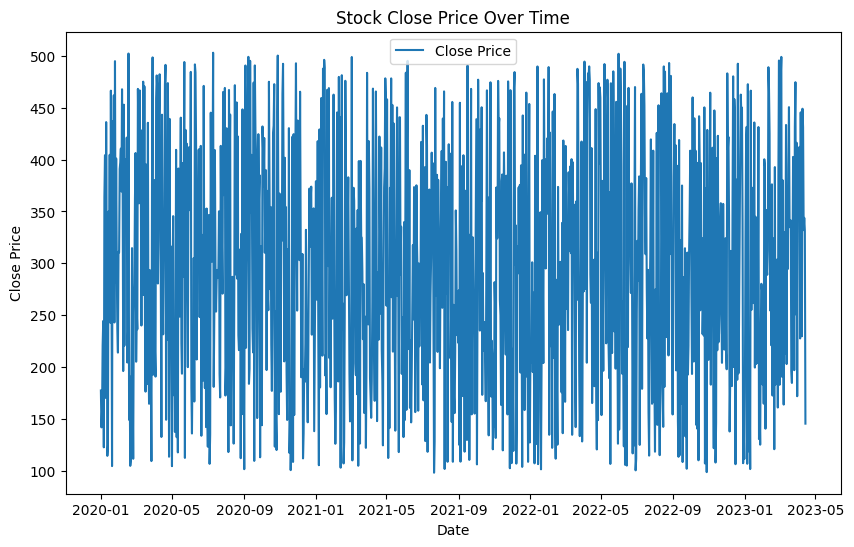

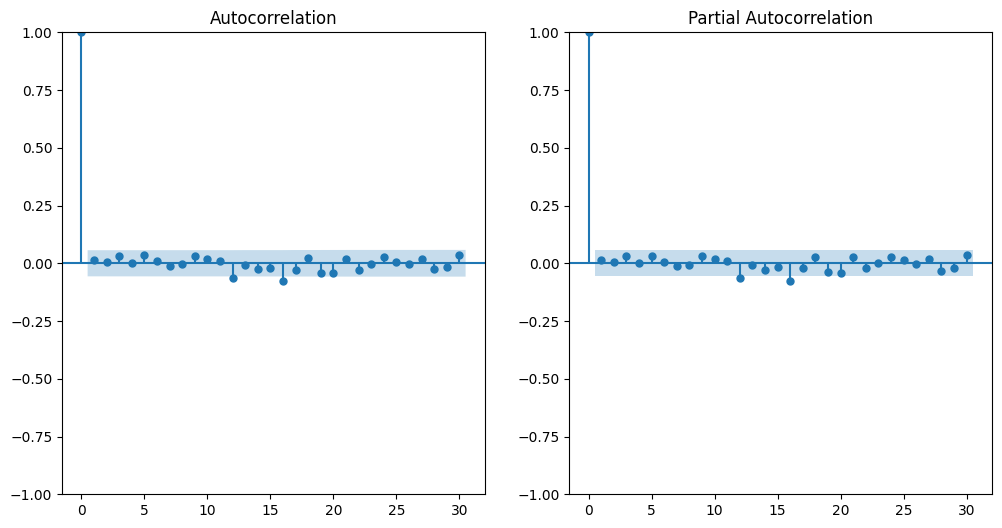

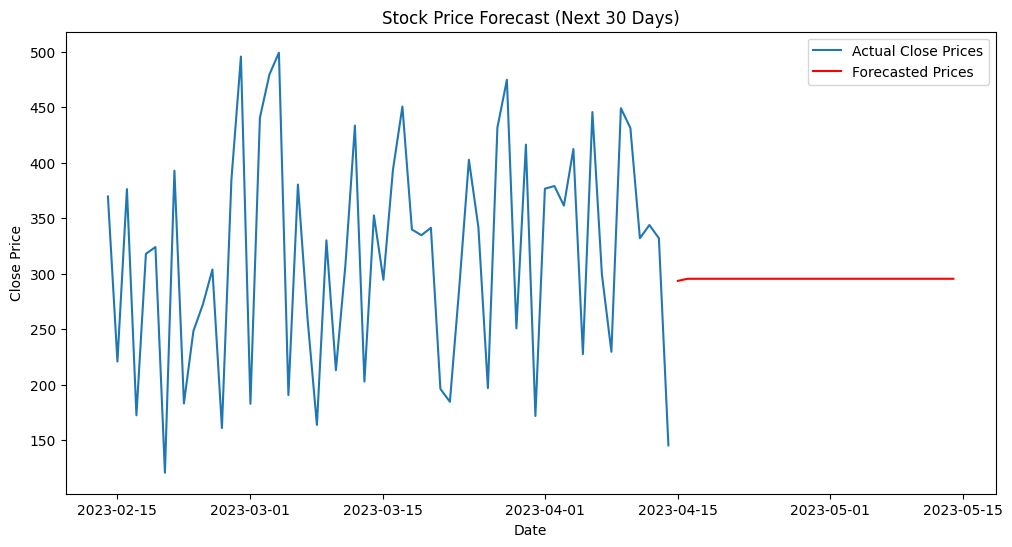

Mean Absolute Error (MAE): 88.49
Root Mean Squared Error (RMSE): 100.11
Mean Absolute Percentage Error (MAPE): 0.29


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from datetime import datetime, timedelta

# Step 1: Generate Synthetic Stock Price Data (with more than 1000 rows)
num_rows = 1200  # Create more than 1000 data points
start_date = datetime(2020, 1, 1)
date_range = [start_date + timedelta(days=i) for i in range(num_rows)]

# Generate random stock prices and trade volume
open_prices = np.round(np.random.uniform(100, 500, num_rows), 2)  # Random Open prices between $100 and $500
close_prices = open_prices + np.round(np.random.uniform(-5, 5, num_rows), 2)  # Close prices close to Open prices
volumes = np.random.randint(100000, 10000000, num_rows)  # Random trading volume between 100,000 and 10,000,000

# Create the DataFrame
stock_data = pd.DataFrame({
    'Date': date_range,
    'Open': open_prices,
    'Close': close_prices,
    'Volume': volumes
})

# Save the data to a CSV file
stock_data.to_csv('synthetic_stock_prices.csv', index=False)

# Load the dataset
df = pd.read_csv('synthetic_stock_prices.csv')

# Step 2: If 'Date' column exists but has leading/trailing spaces, strip them
df.columns = df.columns.str.strip()

# Step 3: Ensure that 'Date' is properly formatted as datetime
if 'Date' in df.columns:
    df['Date'] = pd.to_datetime(df['Date'])
    print("Date column converted successfully")
else:
    print("'Date' column not found in the dataset")

# Set the 'Date' column as the index for time-series analysis and specify the frequency
df.set_index('Date', inplace=True)
df.index.freq = 'D'  # Explicitly set frequency to daily

# Step 4: Preprocess the dataset
# Handle missing values by forward filling
df.ffill(inplace=True)  # Use .ffill() instead of fillna(method='ffill')

# Step 5: Exploratory Data Analysis (EDA)
# Plot the closing prices over time
plt.figure(figsize=(10, 6))
plt.plot(df['Close'], label='Close Price')
plt.title('Stock Close Price Over Time')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.show()

# Plot ACF and PACF for ARIMA parameter selection
plt.figure(figsize=(12, 6))
plt.subplot(121)
plot_acf(df['Close'], ax=plt.gca(), lags=30)
plt.subplot(122)
plot_pacf(df['Close'], ax=plt.gca(), lags=30)
plt.show()

# Step 6: Feature Engineering
# Create lag feature (previous day's close price)
df['Lag_1'] = df['Close'].shift(1)
df.dropna(inplace=True)  # Drop missing values caused by lag feature

# Optional: Perform rolling window calculations for moving averages
df['Moving_Avg_7'] = df['Close'].rolling(window=7).mean()
df['Moving_Avg_30'] = df['Close'].rolling(window=30).mean()

# Step 7: Train ARIMA Model (using (p=1, d=1, q=1) as a starting point)
model = ARIMA(df['Close'], order=(1, 1, 1))  # ARIMA(p, d, q)
model_fit = model.fit()

# Step 8: Make Predictions (Forecast next 30 days)
forecast = model_fit.forecast(steps=30)

# Step 9: Plot forecast vs actual prices
plt.figure(figsize=(12, 6))
plt.plot(df['Close'][-60:], label='Actual Close Prices')  # Last 60 days as actual prices
forecast_dates = pd.date_range(df.index[-1], periods=31, freq='D')[1:]  # Next 30 days forecast dates
plt.plot(forecast_dates, forecast, label='Forecasted Prices', color='red')
plt.title('Stock Price Forecast (Next 30 Days)')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.show()

# Step 10: Evaluate model using MAE, RMSE, and MAPE
# Compare last 30 days actual vs predicted prices
actual = df['Close'][-30:]
predicted = forecast

mae = mean_absolute_error(actual, predicted)
rmse = np.sqrt(mean_squared_error(actual, predicted))
mape = mean_absolute_percentage_error(actual, predicted)

# Print evaluation metrics
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}")
